# Flying Eagle Business Analysis

# Business Understanding

## Problem Statement

Investors seeking to invest in any industry require a clear understanding of safety trends, risk factors and reliability of the tools to be used. The aviation industry being highly capital intensive requires a deep analysis of each of the risks associated with the business. Investors need to identify which aircraft manufacturers to choose, engine models, accident prone areas, type of flights whether personal or public to ensure consumer safety as well as prioritize investment in areas with lower operational risks.

## Objective

The goal of this analysis is to provide investors with insights into safety trends and risks in the aviation industry. Through analysis of historical accident data, the investors can identify patterns that influence accident rates such as weather conditions, number of engines on an aircraft, type of the engine and areas with high accident rates. The insights help investors to make informed business decisions targeting low risks and operational reliability. 

## Research Questions

1. How does the number of engines on an aircraft affect the accident rates? Difference in accident rates for single and multi engine aircraft?
2. What effect to various weather conditions have on safety in the aviation industry?
3. How does aviation safety vary across different regions or countries? What regions have high/low accident rates?

## Success Criteria

1. Insightful findings - The analysis reveals meaningful patterns which oprovide investors with a clearer understanding of the aviation industry helping them make informed decisions on their investments
2. Data driven recommendations - Our analysis should provide data-backed actionable insights to help investors target safer hence more profitable sectors in the industry.
   
3. Relevant and insightful visualizations - visualizations should clearly show trends, comparisons between the effect different different factors such as number of engines, make and engine models have on accident rates.

## Limitations and Assumptions

### Limitations

1. Data completeness -  Reporting of all accidents may not have been done hence the dataset will not cover any unreported cases.
2. Lack of financial metrics - The data does not include financial values hence it will be difficult to make financial decisions based on the dataset alone.
3. External factors - factors not included in the dataset e.g. regulatory changes may also be a contributing factor to the change in trends in the aviation industry.

### Assumptions

1. The data is assumed to be accurate and a reflection of actual events.
2. We assume the reporting is done consistently across different regions and time periods
3. It is assumed the accident data is providing insights into current and future aviation metrics.

# Data Understanding

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings= "ignore"

In [4]:
df = pd.read_csv('data/AviationData.csv', encoding='ISO-8859-1', low_memory=False)

In [5]:
df.head(10)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,NaN,NaN,...,NaN,Air Canada,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,IMC,Unknown,Probable Cause,06-11-2001
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,...,Business,NaN,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982
9,20020909X01560,Accident,MIA82DA029,1982-01-01,"JACKSONVILLE, FL",United States,NaN,NaN,JAX,JACKSONVILLE INTL,...,Personal,NaN,0.0,0.0,3.0,0.0,IMC,Cruise,Probable Cause,01-01-1982


In [6]:
df.shape

(88889, 31)

In [8]:
df.info

<bound method DataFrame.info of              Event.Id Investigation.Type Accident.Number  Event.Date  \
0      20001218X45444           Accident      SEA87LA080  1948-10-24   
1      20001218X45447           Accident      LAX94LA336  1962-07-19   
2      20061025X01555           Accident      NYC07LA005  1974-08-30   
3      20001218X45448           Accident      LAX96LA321  1977-06-19   
4      20041105X01764           Accident      CHI79FA064  1979-08-02   
...               ...                ...             ...         ...   
88884  20221227106491           Accident      ERA23LA093  2022-12-26   
88885  20221227106494           Accident      ERA23LA095  2022-12-26   
88886  20221227106497           Accident      WPR23LA075  2022-12-26   
88887  20221227106498           Accident      WPR23LA076  2022-12-26   
88888  20221230106513           Accident      ERA23LA097  2022-12-29   

              Location        Country   Latitude   Longitude Airport.Code  \
0      MOOSE CREEK, ID  Un

In [12]:
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [13]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [16]:
df.info

<bound method DataFrame.info of              Event.Id Investigation.Type Accident.Number  Event.Date  \
0      20001218X45444           Accident      SEA87LA080  1948-10-24   
1      20001218X45447           Accident      LAX94LA336  1962-07-19   
2      20061025X01555           Accident      NYC07LA005  1974-08-30   
3      20001218X45448           Accident      LAX96LA321  1977-06-19   
4      20041105X01764           Accident      CHI79FA064  1979-08-02   
...               ...                ...             ...         ...   
88884  20221227106491           Accident      ERA23LA093  2022-12-26   
88885  20221227106494           Accident      ERA23LA095  2022-12-26   
88886  20221227106497           Accident      WPR23LA075  2022-12-26   
88887  20221227106498           Accident      WPR23LA076  2022-12-26   
88888  20221230106513           Accident      ERA23LA097  2022-12-29   

              Location        Country   Latitude   Longitude Airport.Code  \
0      MOOSE CREEK, ID  Un

In [17]:
locations_df= pd.read_csv("data/USState_Codes.csv")

In [20]:
locations_df.head()

,US_State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


# Data Preparation

In [23]:
df['Country'].value_counts()

Country
United States                       82248
Brazil                                374
Canada                                359
Mexico                                358
United Kingdom                        344
                                    ...  
Seychelles                              1
Palau                                   1
Libya                                   1
Saint Vincent and the Grenadines        1
Turks and Caicos Islands                1
Name: count, Length: 219, dtype: int64

In [25]:
df = df[df['Country'] == "United States"]

In [27]:
df['Country'].value_counts()

Country
United States    82248
Name: count, dtype: int64

### Merging Datasets

In [30]:
df = df.copy()
df["State_Abbr"] = df["Location"].str.extract(r',\s*([A-Z]{2})$')

In [32]:
locations_df.rename(columns={"Abbreviation": "State_Abbr"}, inplace=True)

In [34]:
df = df.merge(locations_df, on="State_Abbr", how="left")

In [36]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,State_Abbr,US_State
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,ID,Idaho
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,CA,California
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007,VA,Virginia
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,CA,California
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980,OH,Ohio


In [38]:
df.drop(columns="State_Abbr", inplace = True)

### Data Cleaning

In [41]:
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     11
Country                       0
Latitude                  49983
Longitude                 49993
Airport.Code              33176
Airport.Name              30678
Injury.Severity             108
Aircraft.damage            1979
Aircraft.Category         54094
Registration.Number         116
Make                         21
Model                        38
Amateur.Built                21
Number.of.Engines          1875
Engine.Type                3042
FAR.Description           54023
Schedule                  71951
Purpose.of.flight          2429
Air.carrier               67753
Total.Fatal.Injuries      10654
Total.Serious.Injuries    11375
Total.Minor.Injuries      10729
Total.Uninjured            5005
Weather.Condition           645
Broad.phase.of.flight     21090
Report.Status              2611
Publication.Date          12681
US_State

In [42]:
unknown_cols = [
    "Injury.Severity", "Aircraft.damage", "Aircraft.Category",
    "Purpose.of.flight", "Weather.Condition",
    "Broad.phase.of.flight", "Report.Status", "Airport.Code", 
    "Airport.Name", "Schedule", "Air.carrier", "Publication.Date",
    "Registration.Number"
]

# Fill the selected columns with 'Unknown'
df[unknown_cols] = df[unknown_cols].apply(lambda col: col.fillna("Unknown"))

In [44]:
injury_cols = ["Total.Fatal.Injuries", "Total.Serious.Injuries", "Total.Minor.Injuries", "Total.Uninjured"]
df[injury_cols] = df[injury_cols].fillna(0)

In [47]:
df = df.drop(columns = ["Longitude", "Latitude", "FAR.Description"])

In [48]:
df.isna().sum()

Event.Id                     0
Investigation.Type           0
Accident.Number              0
Event.Date                   0
Location                    11
Country                      0
Airport.Code                 0
Airport.Name                 0
Injury.Severity              0
Aircraft.damage              0
Aircraft.Category            0
Registration.Number          0
Make                        21
Model                       38
Amateur.Built               21
Number.of.Engines         1875
Engine.Type               3042
Schedule                     0
Purpose.of.flight            0
Air.carrier                  0
Total.Fatal.Injuries         0
Total.Serious.Injuries       0
Total.Minor.Injuries         0
Total.Uninjured              0
Weather.Condition            0
Broad.phase.of.flight        0
Report.Status                0
Publication.Date             0
US_State                    95
dtype: int64

In [51]:
# Get the mode to fill engine type, model, make
most_frequent_engine_type = df['Engine.Type'].mode()[0]
most_frequent_engine_make = df['Make'].mode()[0]
most_frequent_engine_model = df['Model'].mode()[0]
most_frequent_engine_no = df['Number.of.Engines'].mode()[0]
most_frequent_amateur = df["Amateur.Built"].mode()[0]

# Filling null values with the most frequent values
df['Engine.Type'].fillna(most_frequent_engine_type, inplace=True)
df['Model'].fillna(most_frequent_engine_model, inplace=True)
df['Number.of.Engines'].fillna(most_frequent_engine_no, inplace=True)
df['Make'].fillna(most_frequent_engine_make, inplace=True)
df["Amateur.Built"].fillna(most_frequent_amateur, inplace= True)

In [53]:
# Calculating the mean of the 'Number.of.Engines' column to fill
mean_value = df['Number.of.Engines'].mean()

# Filling null values in 'Number.of.Engines' with the mean
df['Number.of.Engines'].fillna(mean_value, inplace=True)

In [55]:
df = df.dropna(subset=["US_State"])

In [57]:
df.columns = df.columns.str.lower().str.replace('.', '_')

In [59]:
df.isna().sum()

event_id                  0
investigation_type        0
accident_number           0
event_date                0
location                  0
country                   0
airport_code              0
airport_name              0
injury_severity           0
aircraft_damage           0
aircraft_category         0
registration_number       0
make                      0
model                     0
amateur_built             0
number_of_engines         0
engine_type               0
schedule                  0
purpose_of_flight         0
air_carrier               0
total_fatal_injuries      0
total_serious_injuries    0
total_minor_injuries      0
total_uninjured           0
weather_condition         0
broad_phase_of_flight     0
report_status             0
publication_date          0
us_state                  0
dtype: int64

In [61]:
# Checking for duplicated entries in our data.
df.duplicated().sum()

0

In [69]:
import re

# Function to clean illegal characters
def clean_illegal_chars(value):
    if isinstance(value, str):
        return re.sub(r"[\x00-\x1F\x7F-\x9F]", "", value)  # Removes non-printable characters
    return value

# Apply the cleaning function to the whole DataFrame
df = df.applymap(clean_illegal_chars)

C:\Users\user\AppData\Local\Temp\ipykernel_28660\1180481839.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(clean_illegal_chars)


In [71]:
df.to_excel('data/clean_data.xlsx', index=False)

# Data Visualization

## Accidents by State

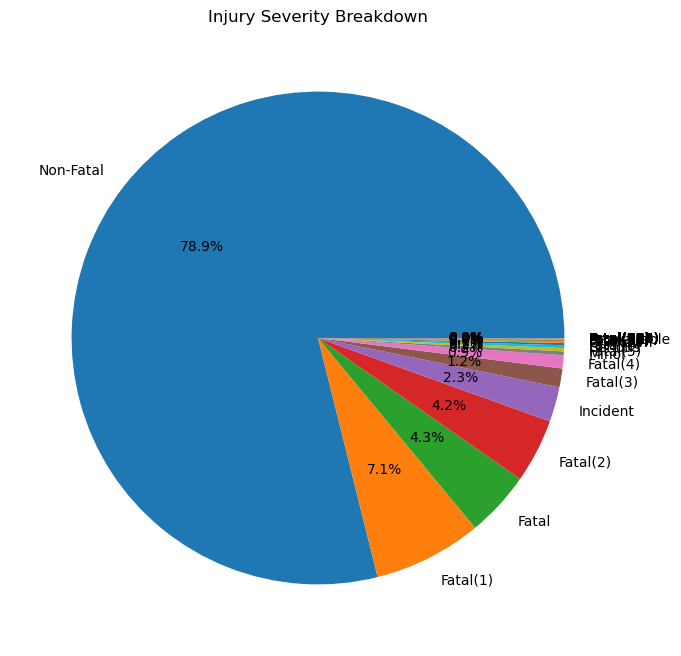

In [51]:
# Injury severity breakdown
plt.figure(figsize=(8, 8))
df['injury_severity'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Injury Severity Breakdown')
plt.ylabel('')
plt.show()

### The visualization cements the idea that multi engine aircraft are less likely to have an accident compared to single engine models which have no backup to rely on incase the main enginwe has technical difficulties

## Accidents per Region

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


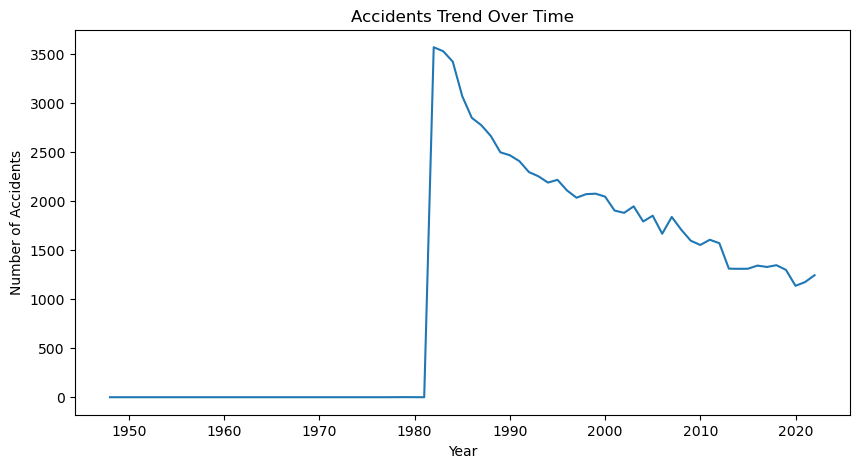

In [55]:
# Accident trend over time
df['event_date'] = pd.to_datetime(df['event_date'])
df['year'] = df['event_date'].dt.year
plt.figure(figsize=(10, 5))
sns.lineplot(data=df['year'].value_counts().sort_index())
plt.title('Accidents Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

### U.S.A. has the highest rates of aviation accidents with over 90% of reported accidents being from there. It would be advisable to operate in other areas where the rates aren't as high.

## Accidents by Engine Make 

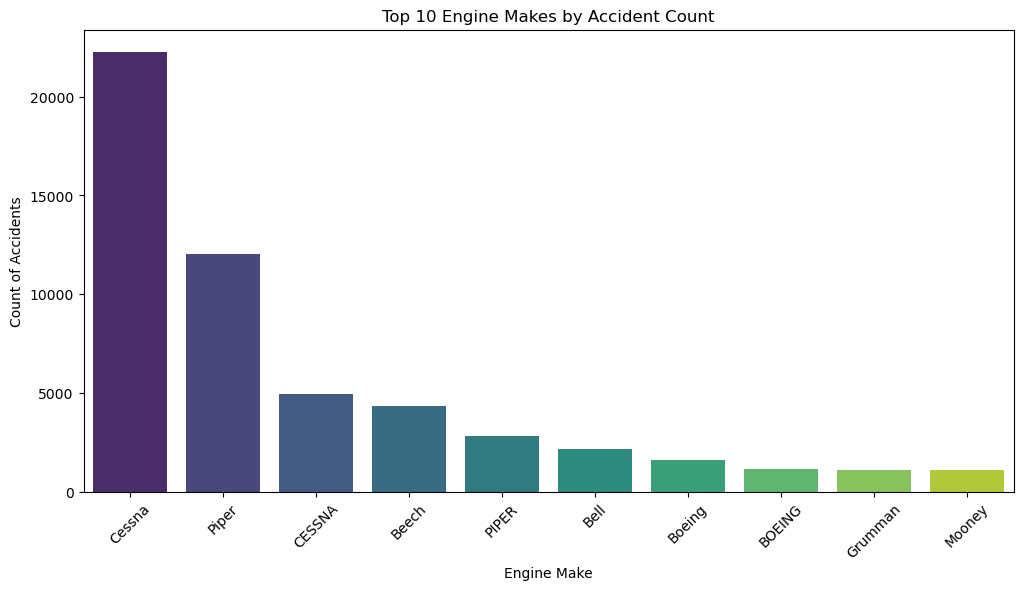

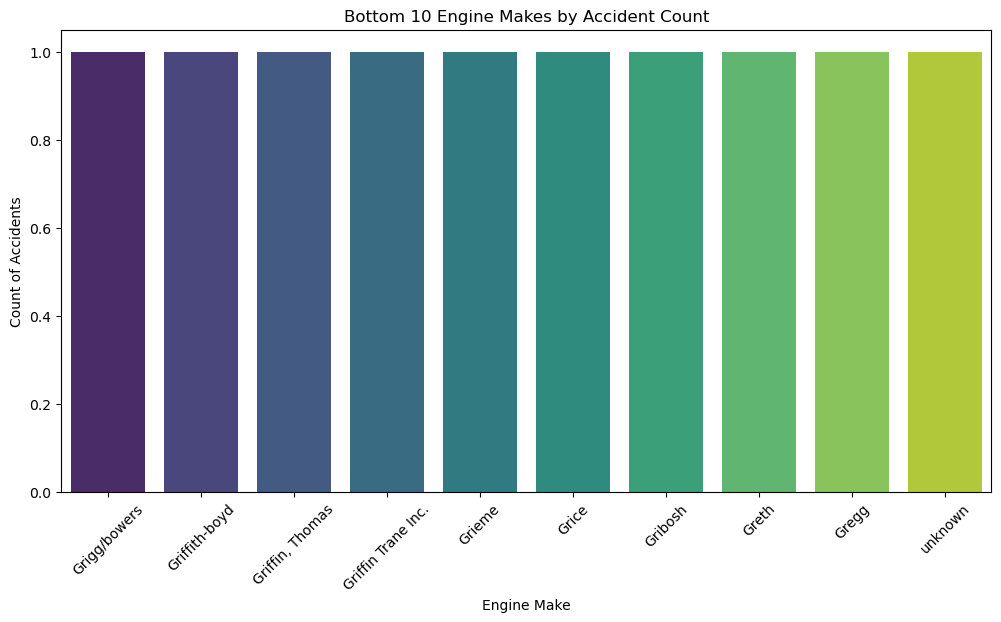

In [46]:
# Group by make and count the number of accidents for each make
accidents_by_make = df.groupby('Make')['Accident.Number'].count().reset_index()
accidents_by_make.rename(columns={'Accident.Number': 'Accident Count'}, inplace=True)

# Sort by accident count
accidents_by_make_sorted = accidents_by_make.sort_values('Accident Count', ascending=False)

# Plot for Top 10 Engine Makes
plt.figure(figsize=(12, 6))
sns.barplot(data=accidents_by_make_sorted.head(10), x='Make', y='Accident Count', palette='viridis')
plt.xlabel("Engine Make")
plt.ylabel("Count of Accidents")
plt.title("Top 10 Engine Makes by Accident Count")
plt.xticks(rotation=45)
plt.show()

# Plot for Bottom 10 Engine Makes
plt.figure(figsize=(12, 6))
sns.barplot(data=accidents_by_make_sorted.tail(10), x='Make', y='Accident Count', palette='viridis')
plt.xlabel("Engine Make")
plt.ylabel("Count of Accidents")
plt.title("Bottom 10 Engine Makes by Accident Count")
plt.xticks(rotation=45)
plt.show()


#### Cessna engines seem to be a safety risk having over 20,000 cases of accidents. It would be advisable to look into safer alternatives such as the Grice, Gregg and the Greth makes.

## Accidents by Engine Model

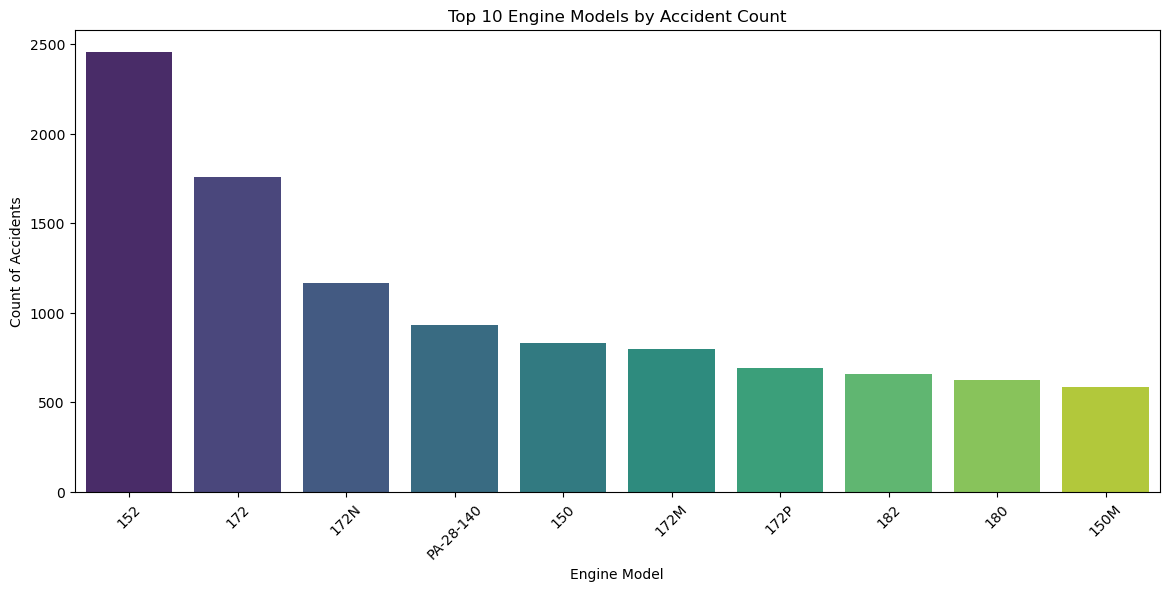

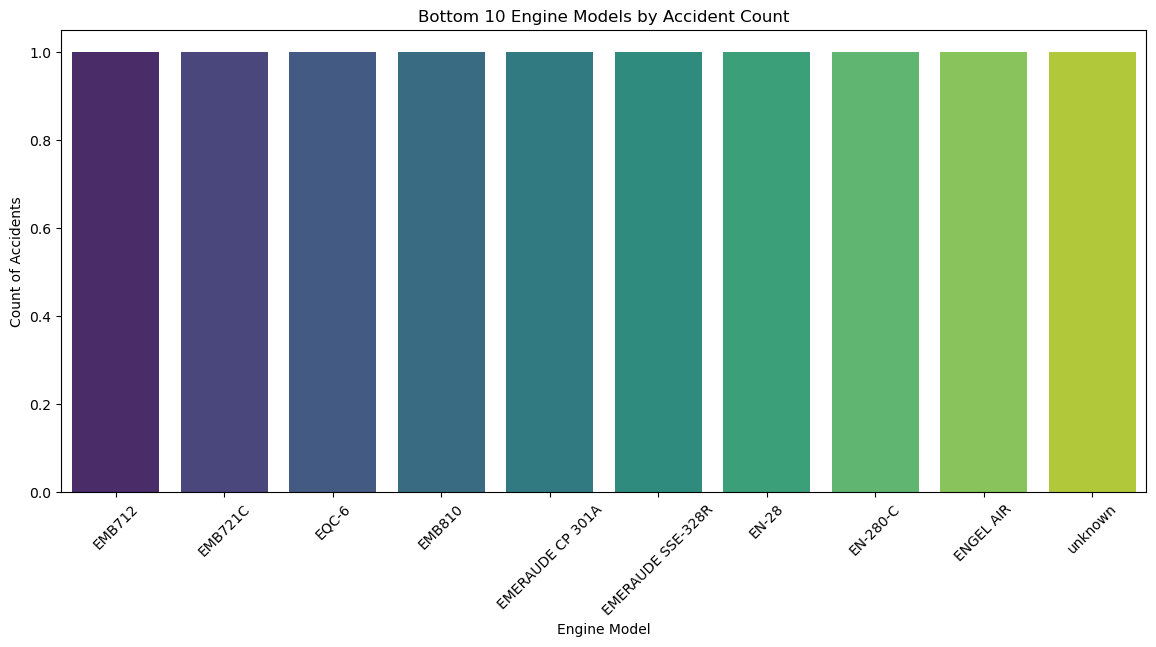

In [51]:
# Group by model and count the number of accidents for each model
accidents_by_model = df.groupby('Model')['Accident.Number'].count().reset_index()
accidents_by_model.rename(columns={'Accident.Number': 'Accident Count'}, inplace=True)

# Sort by accident count
accidents_by_model_sorted = accidents_by_model.sort_values('Accident Count', ascending=False)

# Plot for Top 10 Engine Models
plt.figure(figsize=(14, 6))
sns.barplot(data=accidents_by_model_sorted.head(10), x='Model', y='Accident Count', palette='viridis')
plt.xlabel("Engine Model")
plt.ylabel("Count of Accidents")
plt.title("Top 10 Engine Models by Accident Count")
plt.xticks(rotation=45)
plt.show()

# Plot for Bottom 10 Engine Models
plt.figure(figsize=(14, 6))
sns.barplot(data=accidents_by_model_sorted.tail(10), x='Model', y='Accident Count', palette='viridis')
plt.xlabel("Engine Model")
plt.ylabel("Count of Accidents")
plt.title("Bottom 10 Engine Models by Accident Count")
plt.xticks(rotation=45)
plt.show()


#### The 152 and 172 series of engine models account for most of the accidents in the top 10. It would be advisable to avoid these models and instead go for models that have proven to be safer such as the Engel Air and EN-280C

## Accidents by Weather Conditions

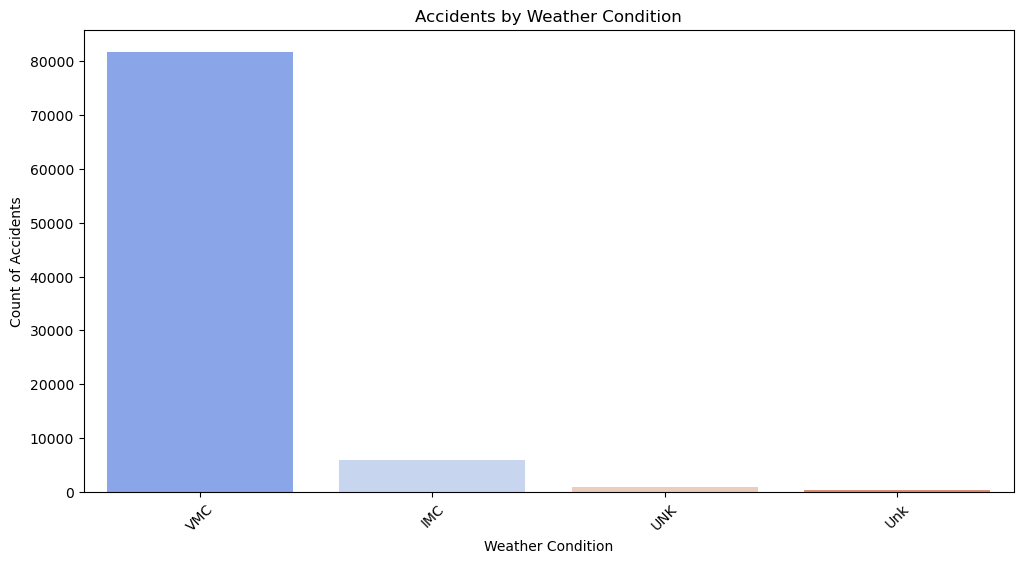

In [54]:
# Group by weather conditions and count the number of accidents for each condition
accidents_by_weather = df.groupby('Weather.Condition')['Accident.Number'].count().reset_index()
accidents_by_weather.rename(columns={'Accident.Number': 'Accident Count'}, inplace=True)

# Sort by accident count in descending order
accidents_by_weather_sorted = accidents_by_weather.sort_values('Accident Count', ascending=False)

# bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=accidents_by_weather_sorted, x='Weather.Condition', y='Accident Count', palette='coolwarm')
plt.xlabel("Weather Condition")
plt.ylabel("Count of Accidents")
plt.title("Accidents by Weather Condition")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()


#### Most accidents happened when the weather condition was defined as VMC. This is an indicator that flights should not opertate under certain weather conditions.

## Purpose of flight vs Number of Accidents.

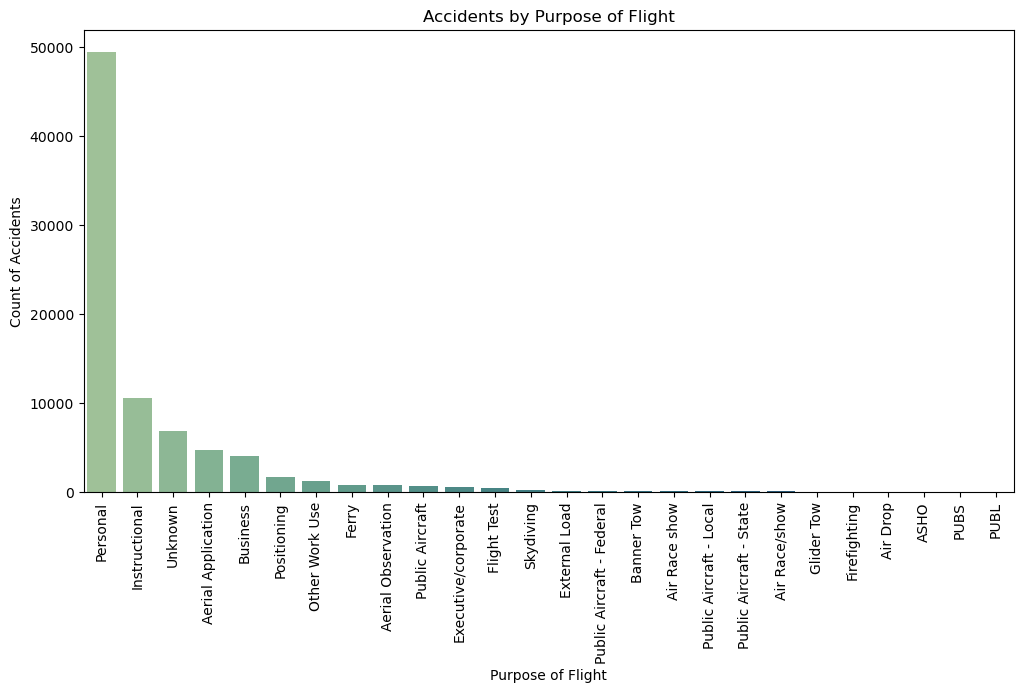

In [61]:
# Number of Accidents based on Purpose of Flight
# Group by 'Purpose.of.Flight' and count the number of accidents for each purpose
accidents_by_purpose = df.groupby('Purpose.of.flight')['Accident.Number'].count().reset_index()
accidents_by_purpose.rename(columns={'Accident.Number': 'Accident Count'}, inplace=True)

# Sort by accident count in descending order for better visualization
accidents_by_purpose_sorted = accidents_by_purpose.sort_values('Accident Count', ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=accidents_by_purpose_sorted, x='Purpose.of.flight', y='Accident Count', palette='crest')
plt.xlabel("Purpose of Flight")
plt.ylabel("Count of Accidents")
plt.title("Accidents by Purpose of Flight")
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()


#### Personal flights lead in the number of accidents with almost 4 times the number of accidents as the next cause. The investors could focus on the less risky areas e.g. public transport aircraft.

## Engine type vs Number of Accidents

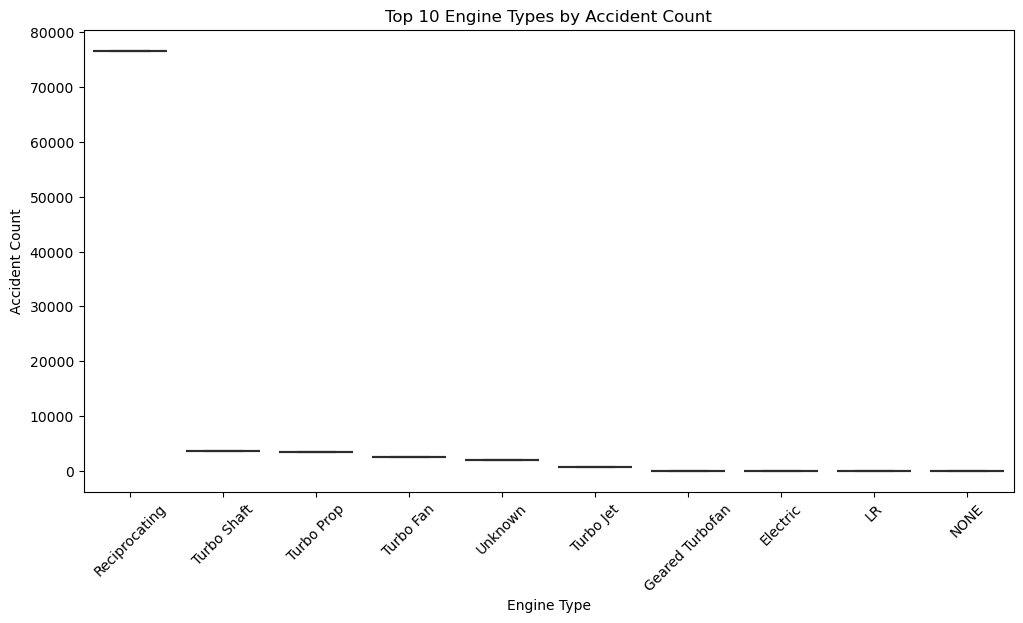

In [65]:
# box plot for the top 10 engine types
accidents_by_engine_type = df.groupby('Engine.Type')['Accident.Number'].count().reset_index()

# Rename the 'Accident.Number' column to 'Accident Count' for clarity
accidents_by_engine_type.rename(columns={'Accident.Number': 'Accident Count'}, inplace=True)

# Sort the data by accident count in descending order
accidents_by_engine_type_sorted = accidents_by_engine_type.sort_values('Accident Count', ascending=False)
top_10_engine_types = accidents_by_engine_type_sorted.head(10)

#plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=top_10_engine_types, x='Engine.Type', y='Accident Count', palette='viridis')
plt.xlabel("Engine Type")
plt.ylabel("Accident Count")
plt.title("Top 10 Engine Types by Accident Count")
plt.xticks(rotation=45)
plt.show()


#### Reciprocating engines had the highest number of accidents. The investor should look into other safer alternatives with a lower failure rate.

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


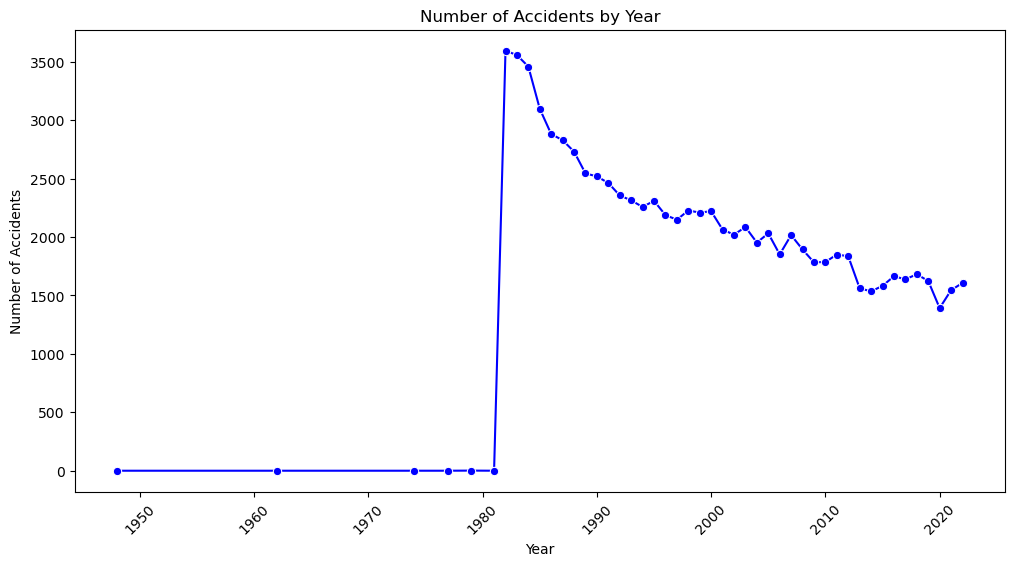

In [67]:
# Convert to year
df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce').dt.year  

# Group by Year and count the number of accidents for each year
accidents_by_year = df.groupby('Event.Date')['Accident.Number'].count().reset_index()

# Line Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=accidents_by_year, x='Event.Date', y='Accident.Number', marker="o", color='b')
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.title("Number of Accidents by Year")
plt.xticks(rotation=45)
plt.show()


#### The line plot shows the recent developments in improving safety measures in the aviation industry seem to be working as shown by the receding number of accidents almost every year. The aviation industry is hence safe to invest in with trends indicating safer flights in the near future.